# PI INF442-1 : Data Cleaning Weather

In [1]:
# Importations

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy import stats
from tqdm import tqdm

In [2]:
# Chargement des donnée des fichiers csv en un seul dataframe
# On utilise des fichiers modifiés auxquels on a rajouté les titres des colonnes
# On transforme tous les éléments numériques en flottants pour les manipuler plus tard

def load_weather_data(filenames,delimiter):
    data = pd.concat((pd.read_csv(f,dtype={'numer_sta':"string",'date':"string"},delimiter=delimiter)
                      for f in filenames), ignore_index=True)
    cols = data.columns[data.dtypes.eq(object)]
    data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
    return data

filenames = ["weather/raw/synop.20"+y+m+".csv" for y in ["07","08","09","10"]
             for m in ["01","02","03","04","05","06","07","08","09","10","11","12"]]

#w_data_raw = load_weather_data(filenames,";")
#w_data_raw.drop(w_data_raw.columns[-1],1,inplace=True)
#w_data = w_data_raw.drop(w_data_raw.index[w_data_raw.index[w_data_raw["numer_sta"] != "07149"]],0,inplace=False)
#w_data.head()

In [3]:
# Exportation des données

w_data.to_csv("weather_orly.csv", index = False)

In [4]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11656 entries, 9 to 679156
Data columns (total 59 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  11656 non-null  string 
 1   date       11656 non-null  string 
 2   pmer       11649 non-null  float64
 3   tend       11629 non-null  float64
 4   cod_tend   11629 non-null  float64
 5   dd         11653 non-null  float64
 6   ff         11653 non-null  float64
 7   t          11649 non-null  float64
 8   td         11649 non-null  float64
 9   u          11649 non-null  float64
 10  vv         11648 non-null  float64
 11  ww         11638 non-null  float64
 12  w1         11261 non-null  float64
 13  w2         11261 non-null  float64
 14  n          11410 non-null  float64
 15  nbas       10099 non-null  float64
 16  hbas       10340 non-null  float64
 17  cl         10167 non-null  float64
 18  cm         10167 non-null  float64
 19  ch         10167 non-null  float64
 20  pres 

Dans un premier temps, on supprime les colonnes dont le nombre de données non manquantes est inférieur à $3\%$ du nombre d'entrées.

On remplira ensuite les autres caractéristiques par des méthodes plus spécifiques ou des méthodes d'interpolation.

In [5]:
# Suppression des colonnes pour lesquelles trop données manquantes (plus de 97%)

cols = w_data.columns
to_drop = []
for i in range(len(cols)):
    if (w_data[cols[i]].count() <= 0.03*len(w_data)):
        to_drop += [i]

w_data.drop(w_data.columns[to_drop],1,inplace=True)
w_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11656 entries, 9 to 679156
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  11656 non-null  string 
 1   date       11656 non-null  string 
 2   pmer       11649 non-null  float64
 3   tend       11629 non-null  float64
 4   cod_tend   11629 non-null  float64
 5   dd         11653 non-null  float64
 6   ff         11653 non-null  float64
 7   t          11649 non-null  float64
 8   td         11649 non-null  float64
 9   u          11649 non-null  float64
 10  vv         11648 non-null  float64
 11  ww         11638 non-null  float64
 12  w1         11261 non-null  float64
 13  w2         11261 non-null  float64
 14  n          11410 non-null  float64
 15  nbas       10099 non-null  float64
 16  hbas       10340 non-null  float64
 17  cl         10167 non-null  float64
 18  cm         10167 non-null  float64
 19  ch         10167 non-null  float64
 20  pres 

Nous sommes maintenant face à plusieurs cas de figures : 

\begin{itemize}
    \item La colonne contient de l'ordre de $90\%$ de données non manquantes, dans ce cas on procède par interpolation par plus proches voisins.
    \item La colonne ne contient pas assez de données pour que l'interpolation soit satisfaisante mais le remplissage par interpolation reste cohérent par la signification des données que l'on image bien progresser de manière linéaire, comme par exemple pour "tn12", "tx12" et "ht_neige".
    \item La colonne contient beaucoup de données manquantes et constitue une information redondante, comme c'est le cas de "rr6", "rr12" et "rr24" qui peuvent être déduits de "rr3", dans ce cas on la supprime.
    \item La colonne a un nombre de données non nulles trop faible (de moins de $20\%$) et la signification de la donnée ne la rend pas facilement complétable, dans ce cas on la supprime également.
\end{itemize}

In [6]:
# Pour "ht_neige" on rajoute des 0 sur les zones longues manquantes, qui correspondent à une absence de neige

w_data['ht_neige'].interpolate(method='linear',limit_direction='both',inplace=True,limit=3)
w_data.fillna({'ht_neige':0},inplace=True)
        
# Suppression des colonnes "rr6", "rr12", "rr24"

w_data.drop(columns=['rr6','rr12','rr24'],inplace=True)

# Suppression des colonnes "per", "perssfrai" qui ne sont pas des mesures

w_data.drop(columns=['per','perssfrai'],inplace=True)

# Suppression des colonnes pour lesquelles encore trop données manquantes pour faire quelque chose (plus de 80%)

cols = w_data.columns
to_drop = []
for i in range(len(cols)):
    if (w_data[cols[i]].count() <= 0.2*len(w_data)):
        to_drop += [i]
w_data.drop(w_data.columns[to_drop],1,inplace=True)



w_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11656 entries, 9 to 679156
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  11656 non-null  string 
 1   date       11656 non-null  string 
 2   pmer       11649 non-null  float64
 3   tend       11629 non-null  float64
 4   cod_tend   11629 non-null  float64
 5   dd         11653 non-null  float64
 6   ff         11653 non-null  float64
 7   t          11649 non-null  float64
 8   td         11649 non-null  float64
 9   u          11649 non-null  float64
 10  vv         11648 non-null  float64
 11  ww         11638 non-null  float64
 12  w1         11261 non-null  float64
 13  w2         11261 non-null  float64
 14  n          11410 non-null  float64
 15  nbas       10099 non-null  float64
 16  hbas       10340 non-null  float64
 17  cl         10167 non-null  float64
 18  cm         10167 non-null  float64
 19  ch         10167 non-null  float64
 20  pres 

In [ ]:
# Pour "tn12" et "tx12" on trace une droite entre chaque valeur non manquante et on complète en fonction

'''
non_null_tn = []
non_null_tx = []

for i in range(len(w_data)):
    if (not w_data['tn12'].isnull()[w_data.index[i]]):
            non_null_tn += [i]
    if (not w_data['tx12'].isnull()[w_data.index[i]]):
            non_null_tx += [i]

for k in range(non_null_tn[0]):
    w_data.at[w_data.index[k],'tn12'] = w_data['tn12'][w_data.index[non_null_tn[0]]]

for i in range(len(non_null_tn)-1):
    a,b = non_null_tn[i], non_null_tn[i+1]
    for k in range(1,b-a):
        w_data.at[w_data.index[a+k],'tn12'] = float(w_data['tn12'][w_data.index[a]]
        + k/(b-a)*(w_data['tn12'][w_data.index[b]]-w_data['tn12'][w_data.index[a]]))

for k in range(non_null_tn[-1]+1,len(w_data)):
    w_data.at[w_data.index[k],'tn12'] = w_data['tn12'][w_data.index[non_null_tn[-1]]]
        
for k in range(non_null_tx[0]):
    w_data.at[w_data.index[k],'tx12'] = w_data['tx12'][w_data.index[non_null_tx[0]]]

for i in range(len(non_null_tx)-1):
    a,b = non_null_tx[i], non_null_tx[i+1]
    for k in range(1,b-a):
        w_data.at[w_data.index[a+k],'tx12'] = float(w_data['tx12'][w_data.index[a]]
        + k/(b-a)*(w_data['tx12'][w_data.index[b]]-w_data['tx12'][w_data.index[a]]))

for k in range(non_null_tx[-1]+1,len(w_data)):
    w_data.at[w_data.index[k],'tx12'] = w_data['tx12'][w_data.index[non_null_tx[-1]]]
'''

# En fait déjà une fonction pour ça

In [7]:
# Pour les autres on remplit par interpolation linéaire

for col in w_data.columns[2:]:
    w_data[col].interpolate(method='linear',limit_direction='both',inplace=True)

In [8]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11656 entries, 9 to 679156
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  11656 non-null  string 
 1   date       11656 non-null  string 
 2   pmer       11656 non-null  float64
 3   tend       11656 non-null  float64
 4   cod_tend   11656 non-null  float64
 5   dd         11656 non-null  float64
 6   ff         11656 non-null  float64
 7   t          11656 non-null  float64
 8   td         11656 non-null  float64
 9   u          11656 non-null  float64
 10  vv         11656 non-null  float64
 11  ww         11656 non-null  float64
 12  w1         11656 non-null  float64
 13  w2         11656 non-null  float64
 14  n          11656 non-null  float64
 15  nbas       11656 non-null  float64
 16  hbas       11656 non-null  float64
 17  cl         11656 non-null  float64
 18  cm         11656 non-null  float64
 19  ch         11656 non-null  float64
 20  pres 

On passe maintenant à l'élimination des outliers avec le Z-score.

In [9]:
# Ajout d'une colonne de Z-score pour chaque métrique

cols = list(w_data.columns)[2:]

for col in cols:
    col_zscore = col + '_zscore'
    w_data[col_zscore] = abs((w_data[col] - w_data[col].mean())/w_data[col].std())

100%|██████████| 50/50 [00:09<00:00,  5.05it/s]


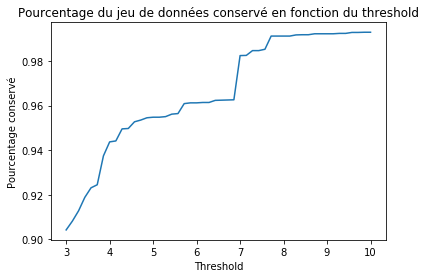

In [10]:
# Graphe des pourcentages d'outliers en fonction du threshold

nbrPts = 50
nbrInit = len(list(w_data.index))
nbrData = [0]*nbrPts
thresholds = np.linspace(3,10,nbrPts)

for i in tqdm(range(nbrPts)):
    new_data = w_data.copy()
    for col in cols:
        col_zscore = col + '_zscore'
        new_data.drop(new_data.index[new_data[col_zscore] >= thresholds[i]],0,inplace=True)
    nbrData[i] = len(list(new_data.index))
    
ratio = np.array(nbrData)/nbrInit
plt.plot(thresholds,ratio)
plt.xlabel("Threshold")
plt.ylabel("Pourcentage conservé")
plt.title("Pourcentage du jeu de données conservé en fonction du threshold")
plt.show()

In [10]:
# Élimination des outliers avec le threshold choisi

nbrInit = len(list(w_data.index))
threshold = 8

for col in cols:
    col_zscore = col + '_zscore'
    w_data.drop(w_data.index[abs(w_data[col_zscore]) >= threshold],0,inplace=True)
    
print(f"Pourcentage d'outliers : {(1 - len(list(w_data.index))/nbrInit)*100:.3}%.")

Pourcentage d'outliers : 0.884%.


Encore une fois, le fait que nous soyons en très grande dimension requiert un threshold élevé pour supprimer seulement un pourcentage acceptable d'outliers. Nous choisissons ici un threshold égal à $8$. Les raisons sont similaires à celles que nous avons évoquées pour notre choix lors du nettoyage des données de consommation de l'habitation.

In [16]:
# Suppression des colonnes de Z-score plus utiles et vérification

w_data.drop(w_data.columns[37:],1,inplace=True)
print(f"Nombre d'entrées conservées : {len(list(w_data.index))}.")
w_data.info()

Nombre d'entrées conservées : 11553.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11553 entries, 9 to 679156
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  11553 non-null  string 
 1   date       11553 non-null  string 
 2   pmer       11553 non-null  float64
 3   tend       11553 non-null  float64
 4   cod_tend   11553 non-null  float64
 5   dd         11553 non-null  float64
 6   ff         11553 non-null  float64
 7   t          11553 non-null  float64
 8   td         11553 non-null  float64
 9   u          11553 non-null  float64
 10  vv         11553 non-null  float64
 11  ww         11553 non-null  float64
 12  w1         11553 non-null  float64
 13  w2         11553 non-null  float64
 14  n          11553 non-null  float64
 15  nbas       11553 non-null  float64
 16  hbas       11553 non-null  float64
 17  cl         11553 non-null  float64
 18  cm         11553 non-null  float64
 19  ch      

On a désormais un jeu de données "nettoyé". Il reste à effectuer un pre-processing avant de pouvoir appliquer les algorithmes classiques. Une première étape est la normalisation des données afin de donner un poids équivalent à chaque caractéristique. Ici certaines données ont des échelles très éloignées (de l'ordre de $10^{-2}$ à $10^6$), il parait donc justifié de normaliser. Pour des algorithmes supposant une distribution gaussienne, il pourra être intéressant d'effectuer plutôt une standardisation.

In [17]:
# Exportation du dataframe en fichier csv

w_data.to_csv(f"preprocessed_weather_orly_{threshold}.csv", index = False)

In [18]:
# Normalisation des données pour donner le même poids aux features

w_data_normalized = w_data.copy()
w_data_normalized[cols] = w_data[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
w_data_normalized.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,rr3,phenspe1,phenspe2,phenspe3,nnuage1,ctype1,hnuage1,nnuage2,ctype2,hnuage2
9,07149,20070101000000,0.670799,0.455056,0.750,0.611111,0.616352,0.532051,0.765333,0.8625,...,0.125,0.962382,0.000000,0.002511,0.142857,0.888889,0.084633,0.428571,0.666667,0.096525
68,07149,20070101030000,0.677686,0.516854,0.375,0.666667,0.452830,0.510684,0.696000,0.7500,...,0.025,0.000000,0.968825,0.001758,0.142857,0.888889,0.084633,0.428571,0.666667,0.096525
127,07149,20070101060000,0.681818,0.511236,0.375,0.638889,0.547170,0.467949,0.629333,0.7125,...,0.000,0.956113,0.000000,0.001005,0.142857,0.888889,0.084633,0.428571,0.666667,0.096525
186,07149,20070101090000,0.709366,0.601124,0.375,0.694444,0.616352,0.433761,0.584000,0.7000,...,0.050,0.965517,0.000000,0.002511,0.142857,0.888889,0.047884,0.428571,0.666667,0.096525
245,07149,20070101120000,0.738292,0.612360,0.000,0.750000,0.547170,0.467949,0.546667,0.5250,...,0.000,0.000000,0.968825,0.997991,0.000000,0.888889,0.091314,0.428571,0.000000,0.884170


In [19]:
# Exportation du dataframe en fichier csv

w_data_normalized.to_csv(f"preprocessed_weather_orly_normalized.csv", index = False)

In [21]:
rows = [i for i in range(1,len(w_data))]

def moyenne_jour(dataframe):
    day_data = pd.DataFrame(columns=w_data.columns)
    ligne_temp = [dataframe.iloc[0,i] for i in range(len(w_data.columns))]
    day_count = 1
    for r in tqdm(rows):
        if (dataframe.iloc[r,1][:8] == ligne_temp[1][:8]):
            day_count += 1
            for c in range(2,len(w_data.columns)):
                ligne_temp[c] += dataframe.iloc[r,c]
        else :
            for c in range(2,len(w_data.columns)):
                ligne_temp[c] = ligne_temp[c] / day_count
            add_data = pd.DataFrame([ligne_temp], columns=w_data.columns)
            day_data = day_data.append(add_data)
            ligne_temp = [dataframe.iloc[r,i] for i in range(len(w_data.columns))]
            day_count = 1
            
    for c in range(2,len(w_data.columns)):
        ligne_temp[c] = ligne_temp[c] / day_count
    add_data = pd.DataFrame([ligne_temp], columns=w_data.columns)
    day_data = day_data.append(add_data)
    print(len(day_data))
    return day_data

weather_day_normalized = moyenne_jour(w_data_normalized)
weather_day_normalized.head()

100%|██████████| 11552/11552 [00:08<00:00, 1387.43it/s]

1458


,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,rr3,phenspe1,phenspe2,phenspe3,nnuage1,ctype1,hnuage1,nnuage2,ctype2,hnuage2
0,07149,20070101000000,0.686639,0.466292,0.578125,0.628472,0.468553,0.455395,0.616667,0.723438,...,0.103125,0.360502,0.601619,0.499969,0.160714,0.888889,0.075863,0.535714,0.555556,0.244691
0,07149,20070102000000,0.774793,0.600421,0.343750,0.732639,0.416667,0.380075,0.548000,0.775000,...,0.087500,0.000000,0.965528,0.997991,0.232143,0.833333,0.084633,0.446429,0.583333,0.238176
0,07149,20070103000000,0.828340,0.438202,0.656250,0.586806,0.275157,0.376068,0.570000,0.851562,...,0.006250,0.000000,0.952938,0.997991,0.607143,0.625000,0.121381,0.830357,0.500000,0.267616
0,07149,20070104000000,0.659607,0.485253,0.453125,0.656250,0.354560,0.437233,0.614000,0.773438,...,0.046875,0.000000,0.961930,0.997991,0.544643,0.784722,0.076698,0.633929,0.562500,0.181467
0,07149,20070105000000,0.731921,0.504213,0.421875,0.614583,0.323113,0.451122,0.649333,0.815625,...,0.006250,0.000000,0.954436,0.997991,0.285714,0.750000,0.056236,0.833333,0.671296,0.120737


In [22]:
weather_day_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 0
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  1458 non-null   object 
 1   date       1458 non-null   object 
 2   pmer       1458 non-null   float64
 3   tend       1458 non-null   float64
 4   cod_tend   1458 non-null   float64
 5   dd         1458 non-null   float64
 6   ff         1458 non-null   float64
 7   t          1458 non-null   float64
 8   td         1458 non-null   float64
 9   u          1458 non-null   float64
 10  vv         1458 non-null   float64
 11  ww         1458 non-null   float64
 12  w1         1458 non-null   float64
 13  w2         1458 non-null   float64
 14  n          1458 non-null   float64
 15  nbas       1458 non-null   float64
 16  hbas       1458 non-null   float64
 17  cl         1458 non-null   float64
 18  cm         1458 non-null   float64
 19  ch         1458 non-null   float64
 20  pres       

In [23]:
# Exportation du dataframe en fichier csv

weather_day_normalized.to_csv(f"preprocessed_weather_norm_day.csv", index = False)

In [32]:
# Création des fichiers d'entraînement et de test

w_day_normalized = load_weather_data(["weather/preprocessed/preprocessed_weather_norm_day.csv"],",")
w_day_normalized.drop(w_day_normalized.columns[0],1,inplace=True)
w_day_normalized.head()

,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,rr3,phenspe1,phenspe2,phenspe3,nnuage1,ctype1,hnuage1,nnuage2,ctype2,hnuage2
0,20070101000000,0.686639,0.466292,0.578125,0.628472,0.468553,0.455395,0.616667,0.723438,0.413237,...,0.103125,0.360502,0.601619,0.499969,0.160714,0.888889,0.075863,0.535714,0.555556,0.244691
1,20070102000000,0.774793,0.600421,0.343750,0.732639,0.416667,0.380075,0.548000,0.775000,0.410456,...,0.087500,0.000000,0.965528,0.997991,0.232143,0.833333,0.084633,0.446429,0.583333,0.238176
2,20070103000000,0.828340,0.438202,0.656250,0.586806,0.275157,0.376068,0.570000,0.851562,0.352058,...,0.006250,0.000000,0.952938,0.997991,0.607143,0.625000,0.121381,0.830357,0.500000,0.267616
3,20070104000000,0.659607,0.485253,0.453125,0.656250,0.354560,0.437233,0.614000,0.773438,0.446607,...,0.046875,0.000000,0.961930,0.997991,0.544643,0.784722,0.076698,0.633929,0.562500,0.181467
4,20070105000000,0.731921,0.504213,0.421875,0.614583,0.323113,0.451122,0.649333,0.815625,0.396552,...,0.006250,0.000000,0.954436,0.997991,0.285714,0.750000,0.056236,0.833333,0.671296,0.120737


In [33]:
w_rows_training = [r for r in range(len(w_day_normalized)) if w_day_normalized["date"][r][:4] != "2010"]
w_day_training = w_day_normalized.iloc[w_rows_training]
w_day_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1095
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1096 non-null   string 
 1   pmer      1096 non-null   float64
 2   tend      1096 non-null   float64
 3   cod_tend  1096 non-null   float64
 4   dd        1096 non-null   float64
 5   ff        1096 non-null   float64
 6   t         1096 non-null   float64
 7   td        1096 non-null   float64
 8   u         1096 non-null   float64
 9   vv        1096 non-null   float64
 10  ww        1096 non-null   float64
 11  w1        1096 non-null   float64
 12  w2        1096 non-null   float64
 13  n         1096 non-null   float64
 14  nbas      1096 non-null   float64
 15  hbas      1096 non-null   float64
 16  cl        1096 non-null   float64
 17  cm        1096 non-null   float64
 18  ch        1096 non-null   float64
 19  pres      1096 non-null   float64
 20  tn12      1096 non-null   floa

In [34]:
w_rows_test = [r for r in range(len(w_day_normalized)) if w_day_normalized["date"][r][:4] == "2010"]
w_day_test = w_day_normalized.iloc[w_rows_test]
w_day_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 1096 to 1457
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      362 non-null    string 
 1   pmer      362 non-null    float64
 2   tend      362 non-null    float64
 3   cod_tend  362 non-null    float64
 4   dd        362 non-null    float64
 5   ff        362 non-null    float64
 6   t         362 non-null    float64
 7   td        362 non-null    float64
 8   u         362 non-null    float64
 9   vv        362 non-null    float64
 10  ww        362 non-null    float64
 11  w1        362 non-null    float64
 12  w2        362 non-null    float64
 13  n         362 non-null    float64
 14  nbas      362 non-null    float64
 15  hbas      362 non-null    float64
 16  cl        362 non-null    float64
 17  cm        362 non-null    float64
 18  ch        362 non-null    float64
 19  pres      362 non-null    float64
 20  tn12      362 non-null    fl

In [35]:
# Création des fichiers d'entraînement et de test

h_day_normalized = load_weather_data(["household_power_consumption/preprocessed/preprocessed_household_norm_day.csv"],",")
h_day_normalized.drop(h_day_normalized.columns[1],1,inplace=True)
h_day_normalized.head()

,date,global_active_power,globale_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,1/1/2007,0.237009,0.120484,0.546978,0.233847,0.000000,0.006433,0.131720
1,2/1/2007,0.103568,0.153005,0.606081,0.105873,0.000000,0.006300,0.146183
2,3/1/2007,0.081226,0.159973,0.657741,0.085274,0.000000,0.006287,0.106743
3,4/1/2007,0.268662,0.161109,0.537339,0.267130,0.018337,0.086599,0.235512
4,5/1/2007,0.233809,0.140803,0.558829,0.232883,0.025119,0.006926,0.170296


In [36]:
h_rows_training = [r for r in range(len(h_day_normalized)) if h_day_normalized["date"][r][-4:] != "2010"]
h_day_training = h_day_normalized.iloc[h_rows_training]
h_day_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1093
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    1094 non-null   string 
 1   global_active_power     1094 non-null   float64
 2   globale_reactive_power  1094 non-null   float64
 3   voltage                 1094 non-null   float64
 4   global_intensity        1094 non-null   float64
 5   sub_metering_1          1094 non-null   float64
 6   sub_metering_2          1094 non-null   float64
 7   sub_metering_3          1094 non-null   float64
dtypes: float64(7), string(1)
memory usage: 76.9 KB


In [37]:
h_rows_test = [r for r in range(len(h_day_normalized)) if h_day_normalized["date"][r][-4:] == "2010"]
h_day_test = h_day_normalized.iloc[h_rows_test]
h_day_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 1094 to 1416
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    323 non-null    string 
 1   global_active_power     323 non-null    float64
 2   globale_reactive_power  323 non-null    float64
 3   voltage                 323 non-null    float64
 4   global_intensity        323 non-null    float64
 5   sub_metering_1          323 non-null    float64
 6   sub_metering_2          323 non-null    float64
 7   sub_metering_3          323 non-null    float64
dtypes: float64(7), string(1)
memory usage: 22.7 KB


In [38]:
h_day_training.to_csv("h_day_training.csv", index = False)
w_day_training.to_csv("w_day_training.csv", index = False)
h_day_test.to_csv("h_day_test.csv", index = False)
w_day_test.to_csv("w_day_test.csv", index = False)

In [39]:
not_seen = []

for h in range(len(h_day_training)):
    h_date = h_day_training.iloc[h,0].split('/')
    seen = 0
    
    for w in range(len(w_day_training)):
        w_date = w_day_training.iloc[w,0]
        
        if (int(h_date[0]) == int(w_date[6:8]) and int(h_date[1]) == int(w_date[4:6])
            and int(h_date[2]) == int(w_date[0:4])):
            
            seen = 1
            
    if (seen == 0):
        not_seen += [h]
        
h_day_training.drop(h_day_training.index[not_seen],0,inplace=True)

print(not_seen)



not_seen = []
    
for w in range(len(w_day_training)):
    w_date = w_day_training.iloc[w,0]
    seen = 0
    
    for h in range(len(h_day_training)):
        h_date = h_day_training.iloc[h,0].split('/')
        
        if (int(h_date[0]) == int(w_date[6:8]) and int(h_date[1]) == int(w_date[4:6])
            and int(h_date[2]) == int(w_date[0:4])):
            
            seen = 1
            
    if (seen == 0):
        not_seen += [w]

w_day_training.drop(w_day_training.index[not_seen],0,inplace=True)

print(not_seen)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[]
[118, 895]


In [40]:
not_seen = []

for h in range(len(h_day_test)):
    h_date = h_day_test.iloc[h,0].split('/')
    seen = 0
    
    for w in range(len(w_day_test)):
        w_date = w_day_test.iloc[w,0]
        
        if (int(h_date[0]) == int(w_date[6:8]) and int(h_date[1]) == int(w_date[4:6])
            and int(h_date[2]) == int(w_date[0:4])):
            
            seen = 1
            
    if (seen == 0):
        not_seen += [h]

h_day_test.drop(h_day_test.index[not_seen],0,inplace=True)

print(not_seen)



not_seen = []

for w in range(len(w_day_test)):
    w_date = w_day_test.iloc[w,0]
    seen = 0
    
    for h in range(len(h_day_test)):
        h_date = h_day_test.iloc[h,0].split('/')
        
        if (int(h_date[0]) == int(w_date[6:8]) and int(h_date[1]) == int(w_date[4:6])
            and int(h_date[2]) == int(w_date[0:4])):
            
            seen = 1
            
    if (seen == 0):
        not_seen += [w]
        
w_day_test.drop(w_day_test.index[not_seen],0,inplace=True)

print(not_seen)

[7, 8, 9]
[9, 226, 227, 228, 229, 265, 266, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361]


In [41]:
print(len(h_day_training))
print(len(w_day_training))
print(len(h_day_test))
print(len(w_day_test))

1094
1094
320
320


In [42]:
h_day_training.drop(h_day_training.columns[0],1,inplace=True)
h_day_test.drop(h_day_test.columns[0],1,inplace=True)
w_day_training.drop(w_day_training.columns[0],1,inplace=True)
w_day_test.drop(w_day_test.columns[0],1,inplace=True)

In [65]:
w_day_training.reset_index(drop=True, inplace=True)
h_day_training.reset_index(drop=True, inplace=True)
w_day_test.reset_index(drop=True, inplace=True)
h_day_test.reset_index(drop=True, inplace=True)

trainset = pd.concat([w_day_training, h_day_training], axis = 1)
testset = pd.concat([w_day_test, h_day_test], axis = 1)

In [66]:
trainset.to_csv("trainset.csv", index = False)
testset.to_csv("testset.csv", index = False)

In [67]:
import sklearn.preprocessing as pp

def PolynomialFeatures_labeled(input_df,power):
    poly = pp.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

w_day_training_2 = PolynomialFeatures_labeled(w_day_training,2)
w_day_test_2 = PolynomialFeatures_labeled(w_day_test,2)

In [68]:
trainset_2 = pd.concat([w_day_training_2, h_day_training], axis = 1)
testset_2 = pd.concat([w_day_test_2, h_day_test], axis = 1)

trainset_2.to_csv("trainset_2.csv", index = False)
testset_2.to_csv("testset_2.csv", index = False)

In [69]:
len(w_day_training_2.columns)

666